In [1]:
from wordcloud import ImageColorGenerator, WordCloud, STOPWORDS
import nltk
from konlpy.tag import Okt
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('static/data/melon_song_morphs.csv')

In [3]:
df.head(1)

,Unnamed: 0,songId,title,artist,genre,album,lyricist,composer,date,img,comment,like,lyric,plylstSeq,ly_summary,morphs
0,0,418168,희재,성시경,발라드 국내영화,국화꽃 향기 OST,양재선,MGR,2003.02.01,https://cdnimg.melon.co.kr/cm/album/images/000...,332,138267,햇살은 우릴 위해 내리고\n바람도 서롤 감싸게 했죠\n우리 웃음속에 계절은 오고\n...,445029956 411111859,정말로 울면 내가 그댈 보내<br>준 것 같아서,햇살 우릴 위해 내리다 바람 서 롤 감싸다 하다 우리 웃음 속 계절 오다 또 가다 ...


In [4]:
year = []
for i in df.date.values:
    if i == '-':
        year.append(0)
    else:
        a = int(i[:4])
        if 1960 <= a < 1970:
            year.append(1960)
        elif 1970 <= a < 1980: 
            year.append(1970)
        elif 1980 <= a < 1990: 
            year.append(1980)
        elif 1990 <= a < 2000: 
            year.append(1990)
        elif 2000 <= a < 2010: 
            year.append(2000)
        elif 2010 <= a < 2020: 
            year.append(2010)
        else:
            year.append(2020)
df['year'] = year

In [5]:
df = df[['songId', 'year', 'lyric']]
df.head()

,songId,year,lyric
0,418168,2000,햇살은 우릴 위해 내리고\n바람도 서롤 감싸게 했죠\n우리 웃음속에 계절은 오고\n...
1,35609035,2020,하나만 알고 둘은\n잘 모르는 사람입니다\n하루는 비틀거리고\n하루는 뒤뚱거리고\n...
2,1046278,2000,서쪽하늘로 노을은 지고\n이젠 슬픔이 돼버린 그대를\n다시 부를수 없을 것 같아\n...
3,35609034,2020,누군가를 다시 만난다면\n여전히 나는 너를\n누군가를 다시 사랑하면\n영원히 나는 ...
4,35728845,2020,말해야 하는데 네 앞에 서면\n아무 말 못 하는 내가 미워져\n용기를 내야 해 후회...


In [6]:
df.fillna('', inplace=True)
df.isna().sum()

songId    0
year      0
lyric     0
dtype: int64

- 발라드+발라드/국내드라마
- 댄스
- R&B/Soul
- 랩/힙합
- 국내뮤지컬
- 성인가요/트로트
- 록/메탈
- 포크/블루스

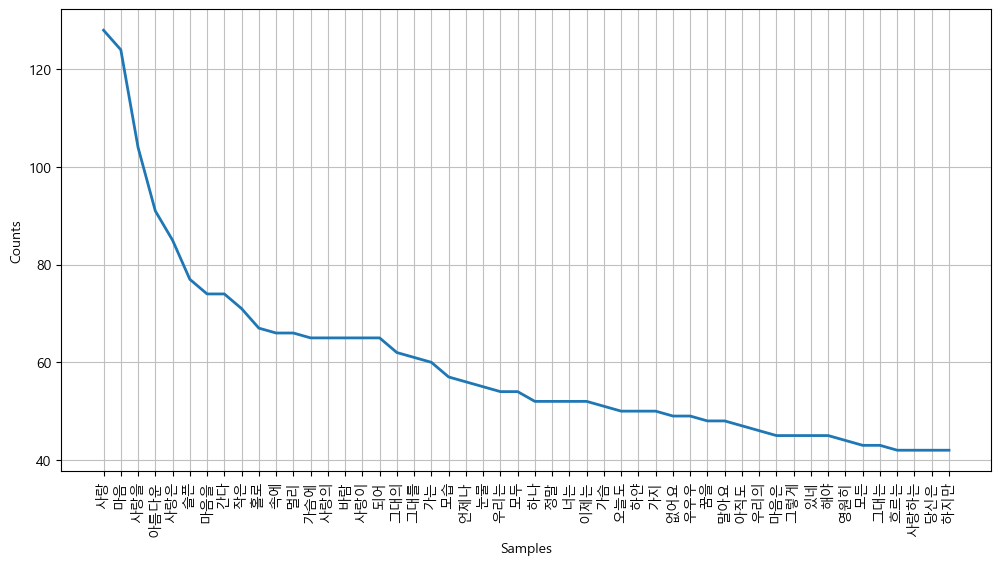

In [9]:
eighty = df[df.year == 1980]
sw_wc = STOPWORDS
a = ' '.join(eighty.lyric.values.tolist()).replace('\n', ' ').split()
filtered_list = [word for word in a if len(word) > 1]
stoptext = """
    그대 내가 너를 나를 다시 나의 너의 우리 나는 없는 내게 그댈 니가 이렇게 네가 없어 있어 있는 거야 같아 싶어 너무 사람 이젠
    oh Oh uh la eh La yeah Im na Ah
"""
stop_words = stoptext.split()
stop_words.extend(sw_wc)
b = [word for word in filtered_list if word not in stop_words]
gift = nltk.Text(b, name='1980s')
plt.figure(figsize=(12,6))
gift.plot(50);

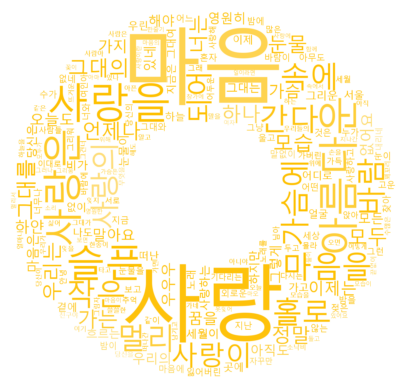

In [11]:
mask = np.array(Image.open('static/img/donut/도넛2.jpg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask, stopwords=sw_wc
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');

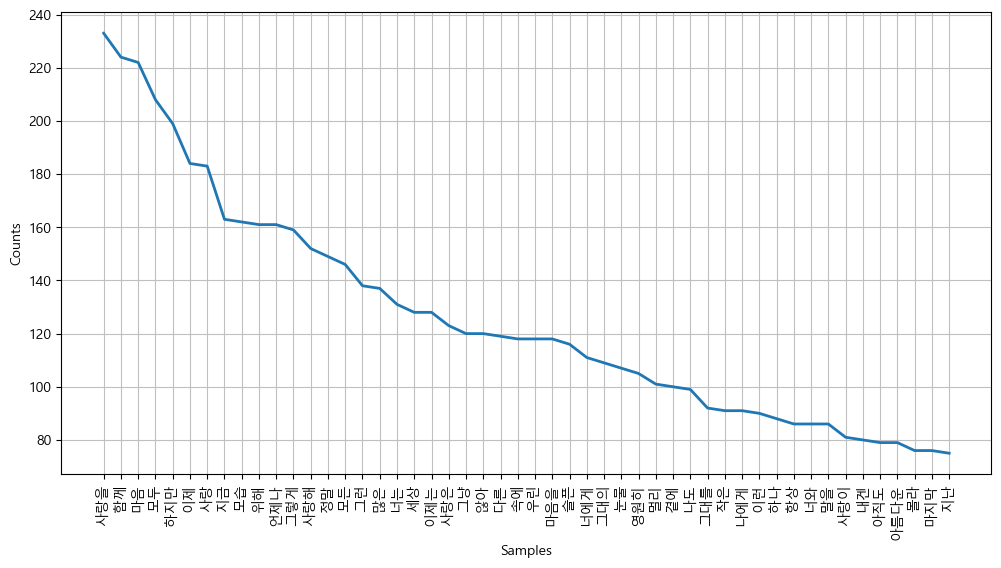

In [12]:
ninety = df[df.year == 1990]
sw_wc = STOPWORDS
a = ' '.join(ninety.lyric.values.tolist()).replace('\n', ' ').split()
filtered_list = [word for word in a if len(word) > 1]
stoptext = """
    그대 내가 너를 나를 다시 나의 너의 우리 나는 없는 내게 그댈 니가 이렇게 네가 없어 있어 있는 거야 같아 싶어 너무 사람 이젠
    oh Oh uh la eh La yeah Im na Ah
"""
stop_words = stoptext.split()
stop_words.extend(sw_wc)
b = [word for word in filtered_list if word not in stop_words]
gift = nltk.Text(b, name='1990s')
plt.figure(figsize=(12,6))
gift.plot(50);

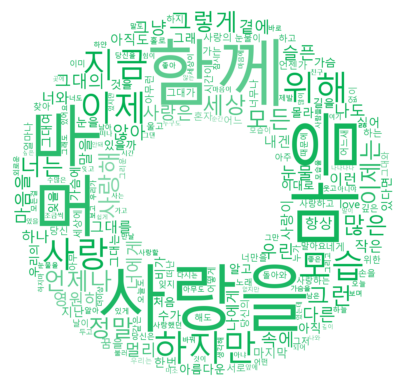

In [13]:
mask = np.array(Image.open('static/img/donut/도넛9.jpg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask, stopwords=sw_wc
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');

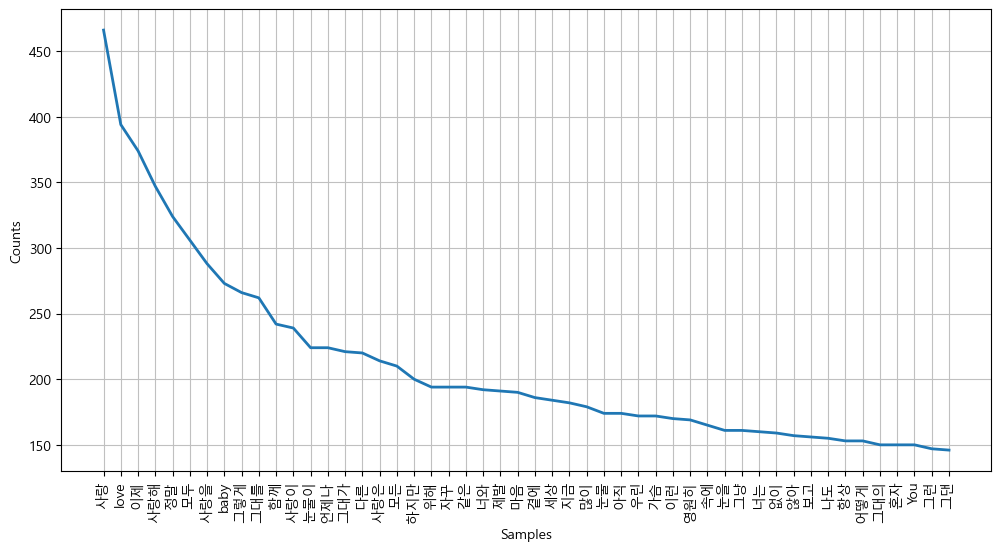

In [14]:
two = df[df.year == 2000]
sw_wc = STOPWORDS
a = ' '.join(two.lyric.values.tolist()).replace('\n', ' ').split()
filtered_list = [word for word in a if len(word) > 1]
stoptext = """
    그대 내가 너를 나를 다시 나의 너의 우리 나는 없는 내게 그댈 니가 이렇게 네가 없어 있어 있는 거야 같아 싶어 너무 사람 이젠
    oh Oh uh la eh La yeah Im na Ah
"""
stop_words = stoptext.split()
stop_words.extend(sw_wc)
b = [word for word in filtered_list if word not in stop_words]
gift = nltk.Text(b, name='2000s')
plt.figure(figsize=(12,6))
gift.plot(50);

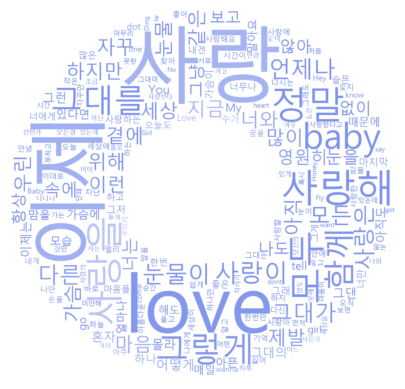

In [15]:
mask = np.array(Image.open('static/img/donut/도넛6.jpg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask, stopwords=sw_wc
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');

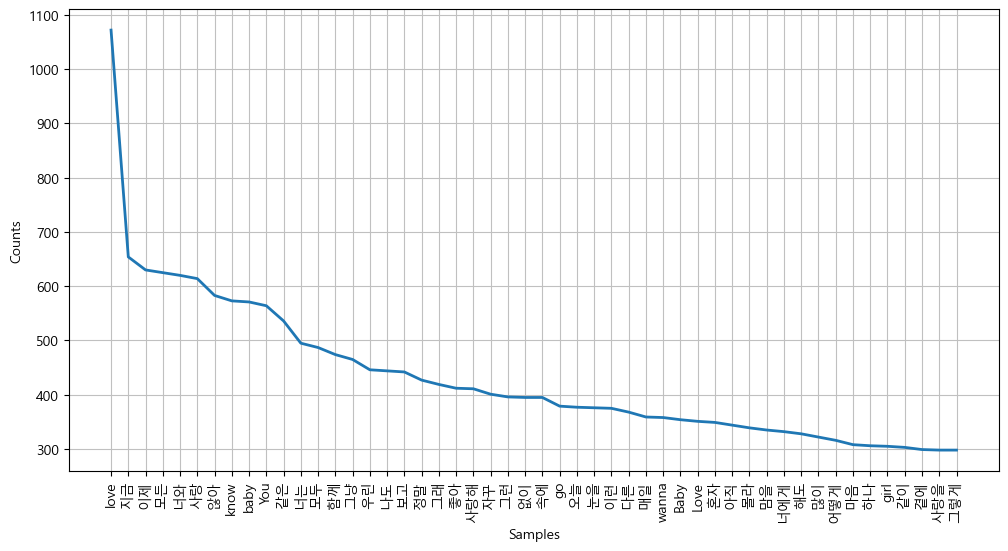

In [16]:
ten = df[df.year == 2010]
sw_wc = STOPWORDS
a = ' '.join(ten.lyric.values.tolist()).replace('\n', ' ').split()
filtered_list = [word for word in a if len(word) > 1]
stoptext = """
    그대 내가 너를 나를 다시 나의 너의 우리 나는 없는 내게 그댈 니가 이렇게 네가 없어 있어 있는 거야 같아 싶어 너무 사람 이젠
    oh Oh uh la eh La yeah Im na Ah
"""
stop_words = stoptext.split()
stop_words.extend(sw_wc)
b = [word for word in filtered_list if word not in stop_words]
gift = nltk.Text(b, name='2010s')
plt.figure(figsize=(12,6))
gift.plot(50);

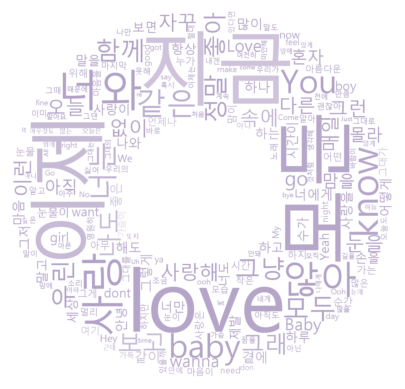

In [17]:
mask = np.array(Image.open('static/img/donut/도넛5.jpg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask, stopwords=sw_wc
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');

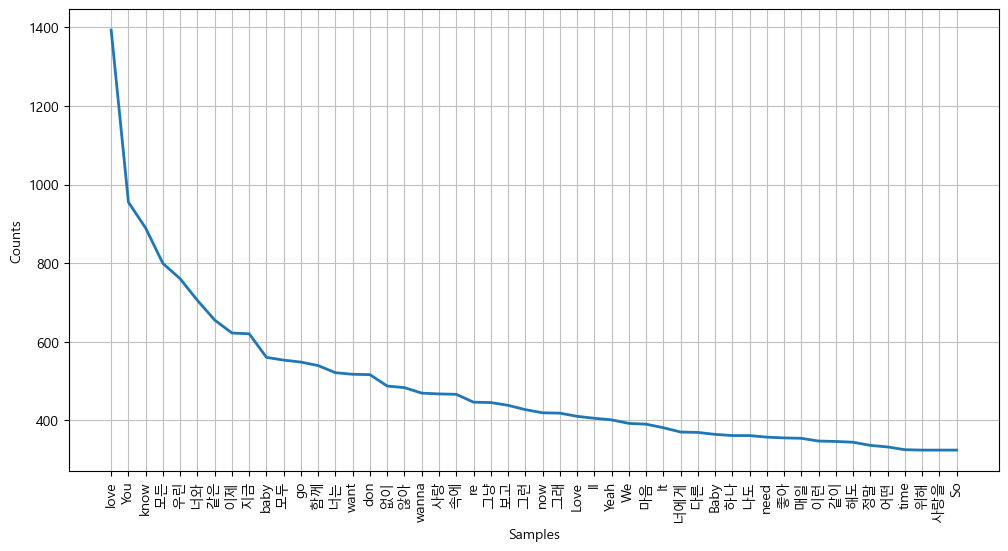

In [18]:
twenty = df[df.year == 2020]
sw_wc = STOPWORDS
a = ' '.join(twenty.lyric.values.tolist()).replace('\n', ' ').split()
filtered_list = [word for word in a if len(word) > 1]
stoptext = """
    그대 내가 너를 나를 다시 나의 너의 우리 나는 없는 내게 그댈 니가 이렇게 네가 없어 있어 있는 거야 같아 싶어 너무 사람 이젠
    oh Oh uh la eh La yeah Im na Ah
"""
stop_words = stoptext.split()
stop_words.extend(sw_wc)
b = [word for word in filtered_list if word not in stop_words]
gift = nltk.Text(b, name='2020s')
plt.figure(figsize=(12,6))
gift.plot(50);

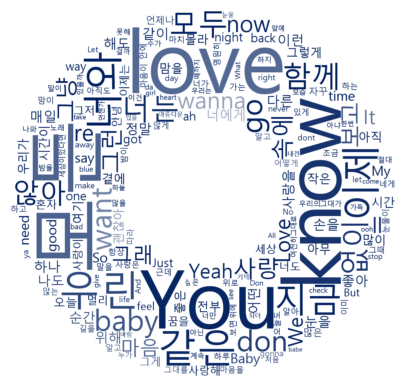

In [19]:
mask = np.array(Image.open('static/img/donut/도넛8.jpg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask, stopwords=sw_wc
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');